# Recursive Density Estimation

En este cuaderno vamos trabajar el concepto de Recursive Density Estimation (RDE) planteado por Angelov en el 2011, [link](https://ieeexplore.ieee.org/document/6084013).

Aplicar este método tiene cómo objetivo la **detección de anomalías** en sistemas industriales, destacando ser **no paramétrico** y **ligero** (aplicable en tiempo real).

## Imports

Empezamos importando aquellas librerías que nos harán falta. En este caso podriamos llegar a desarrollar el algoritmo entero sin ninguna librería extra. Esto es interesante para ser exportado a otros sistemas.

In [128]:
import numpy as np # Crear la serie de datos sintética
import matplotlib.pyplot as plt # Visualizar los resultados

## Clases y funciones propias

En este caso solo crearemos la clase que permita ejecutar la fórmula del RDE.

$D(X_k) = \frac{1}{1+||X_k-\mu_k||^2 + \sum_{k}- ||\mu_k||^2}$

Y el resto de instantes ($k>1$)
- $\mu_k = \frac{k-1}{k} \mu_{k-1} + \frac{1}{k}X_k$ donde $\mu_1=X_1$

- $\sum_{k}=\frac{k-1}{k}\sum_{k-1}+\frac{1}{k}||x_k||^2$ donde $\sum_{1}=||X_1||^2$

Entendiendo cómo,
- $k$ el instante de tiempo.
- $X_k$ la muestra en un instante de tiempo determinado.
- $\mu_k$ la media de muestras hasta un instante de tiempo determinado.
- $\sum_k$ el producto escalar.
- $D(X_k)$ la densidad.

In [124]:
class RDE():
    def __init__(self):
        self.mu = None
        self.scalarProd = None
        self.k = 1

    def update_mean(self, x):
        if self.k == 1:
            self.mu = x
        else:
            self.mu = ((self.k-1)/self.k)*self.mu + (1/self.k)*x

    def update_scalarProduct(self, x):
        norm_x = x ** 2
        if self.k == 1:
            self.scalarProd = norm_x
        else:
            self.scalarProd = ((self.k-1)/self.k)*self.scalarProd + (1/self.k)*norm_x

    def update_moment(self):
        self.k += 1

    def density(self, x):
        self.update_mean(x)
        self.update_scalarProduct(x)
        self.update_moment()

        return 1 / (1 + (x-self.mu)**2 + self.scalarProd - (self.mu**2))

## Datos

Creamos un dataset con un cambio claro y aplicamos RDE.

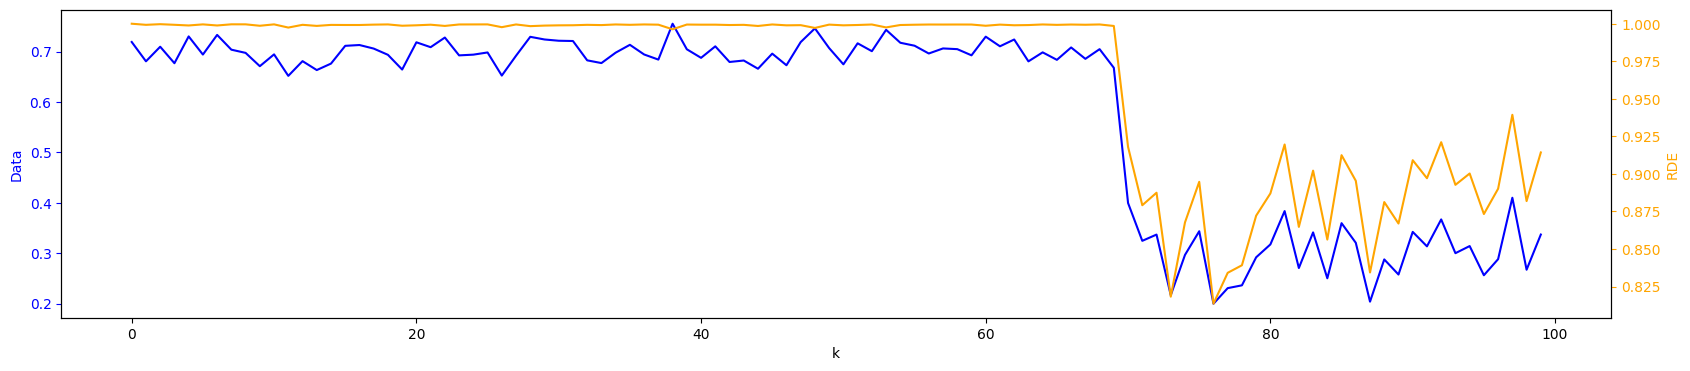

In [150]:
# Genero datos pra test
np.random.seed(689)
data = np.zeros(100)
data[:70] = np.random.normal(loc=0.7, scale=0.02, size=70)
data[70:] = np.random.normal(loc=0.3, scale=0.05, size=30)

# Calculo RDE
rde = RDE()
densities = [rde.density(x) for x in data]

# Visualizo los datos
fig, ax1 = plt.subplots(figsize=(20, 4))

# Creo un segundo eje Y (ax2) compartiendo el mismo eje X
ax2 = ax1.twinx()

# Plot para la primera línea en el eje izquierdo (ax1)
ax1.plot(data, color='b', label='Data')
ax1.set_xlabel('k')
ax1.set_ylabel('Data', color='b')
ax1.tick_params('y', colors='b')

# Plot para la segunda línea en el eje derecho (ax2)
ax2.plot(densities, color='orange', label='RDE')
ax2.set_ylabel('RDE', color='orange')
ax2.tick_params('y', colors='orange')

plt.show()

En la prueba anterior hemos visto el comportamiento de RDE frente a un cambio abrupto que se mantiene en el tiempo. Veamo en un instante de tiempo concreto.

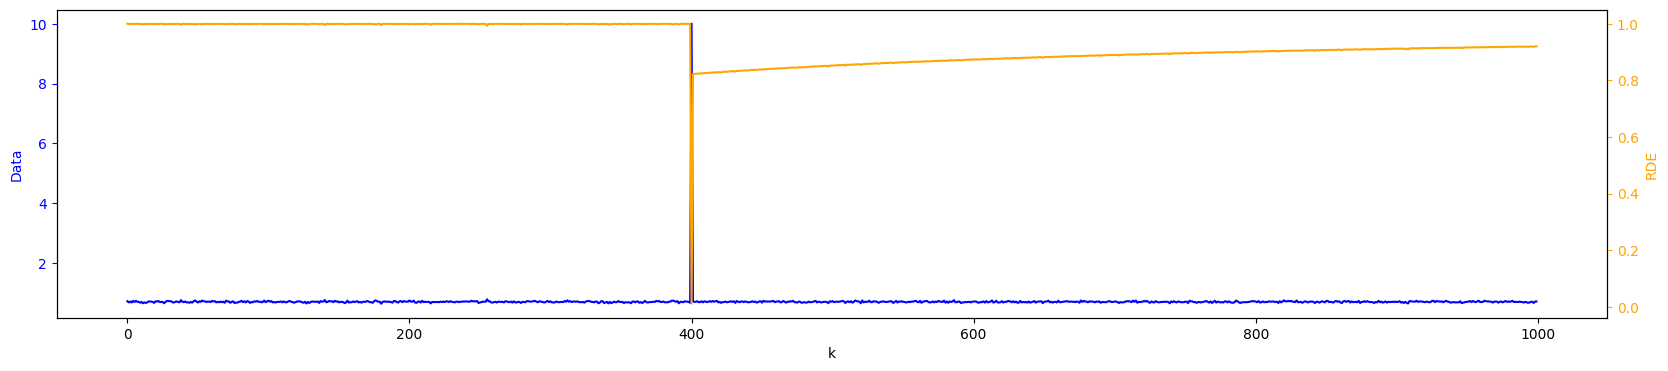

In [160]:
# Genero datos pra test
np.random.seed(689)
data = np.random.normal(loc=0.7, scale=0.02, size=1000)
data[400] = 10

# Calculo RDE
rde = RDE()
densities = [rde.density(x) for x in data]

# Visualizo los datos
fig, ax1 = plt.subplots(figsize=(20, 4))

# Creo un segundo eje Y (ax2) compartiendo el mismo eje X
ax2 = ax1.twinx()

# Plot para la primera línea en el eje izquierdo (ax1)
ax1.plot(data, color='b', label='Data')
ax1.set_xlabel('k')
ax1.set_ylabel('Data', color='b')
ax1.tick_params('y', colors='b')

# Plot para la segunda línea en el eje derecho (ax2)
ax2.plot(densities, color='orange', label='RDE')
ax2.set_ylabel('RDE', color='orange')
ax2.tick_params('y', colors='orange')

plt.show()

¡Vemos cómo es capaz de detectarlo! Además, al ser un método recursivo vemos cómo este error lo va arrastrando y absorbiendo a medida que pasa el tiempo.